(array([ 56.,  89., 109., 121., 125., 126., 120., 110.,  89.,  55.]),
 array([-8.88237876e+01, -7.10445008e+01, -5.32652140e+01, -3.54859272e+01,
        -1.77066404e+01,  7.26463796e-02,  1.78519332e+01,  3.56312200e+01,
         5.34105068e+01,  7.11897936e+01,  8.89690804e+01]),
 <a list of 10 Patch objects>)

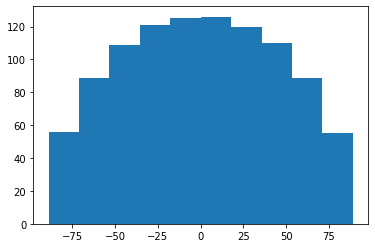

In [14]:
# Задача 1
import numpy as np
import matplotlib.pyplot as plt
n = 1000
a = np.random.normal (0 , 1 , (n , n ))
A = a + a.T
F = np.linalg.eigvalsh(A)
plt.hist(F)


In [15]:
#Задача 2
import numpy as np
import matplotlib.pyplot as plt

n = 10
a = np.random.normal(0,1,(n,n)) #Строим матрицу
A = a @ a.T
# print(A)

np.linalg.eigvalsh(A) # Вычисляем собственные числа

np.diag(A)
np.linalg.eigvalsh(A)

# Посчитаем какое кол-во операци нужно чтобы приблизить минимальное с.ч с точностью 1%

n = 10
a = np.random.normal(0,1,(n,n))
A = a @ a.T
N = 0
lmin = np.linalg.eigvalsh(A).min()
for i in range(1000):
    q,r = np.linalg.qr(A)
    A = r @ q
    N+=1
    if (100*np.abs(A.diagonal().min()/lmin - 1) < 1):
        break
        
print(N)


# print(np.diag(A))
# print()
# print(np.linalg.eigvalsh(A))

2


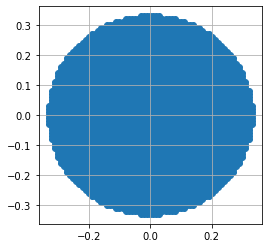

In [16]:
# Задача 3, пункт а
import numpy as np

A = np.array([[0,1],[0,0]]) #вводим данную матрицу
e = 0.1 #определяем эпсилон, также из условия
F = np.linalg.eigvalsh(A)
# print(F)
Re = []
Im = []
absc = []
i = 0
for x in np.arange(-1,1,0.01):
    for y in np.arange(-1,1,0.01):
        z = complex(x,y) 
        Avozm = ([[z,-1],[0,z]]) #возмущенная матрица
        Rev = np.linalg.inv(Avozm)
        if np.linalg.norm(Rev,2) >= e**(-1):
            Re.append(x)
            Im.append(y)
            absc.append(z)
            i = i+1    
ordin = np.arange(i)

fig = plt.gcf()
fig.set_size_inches(4, 4)
plt.grid(axis = 'both')
# plt.scatter(ordin,absc) 
plt.scatter(Re,Im) 

C:\Users\79852\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


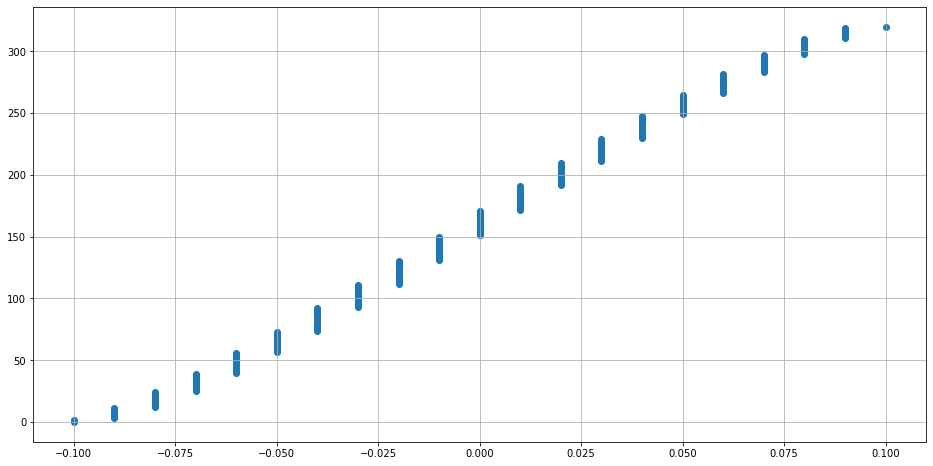

In [17]:
#пункт б
e = 0.01
Re = []
Im = []
absc = []
i = 0
for x in np.arange(-2,2,0.01):
    for y in np.arange(-2,2,0.01):
        z = complex(x,y) 
        Avozm = ([[z,-1],[0,z]]) #возмущенная матрица Avozm = (ZI-A)
        R = np.linalg.inv(Avozm)
        if np.linalg.norm(R,2) >= e**(-1):
            Re.append(x)
            Im.append(y)
            absc.append(z)
            i = i+1

ordin = np.arange(i)

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.grid(axis = 'both')
plt.scatter(absc,ordin)



In [32]:
# Задача №4
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

A = np.array([[3,1,0,0],[1,2,0,1],[0,0,1,1],[0,1,1,1]])
print('1) Cтепенной метод')
v = np.random.random(4)
v/=LA.norm(v) # Нормируем
for i in range(20): # Цикл для поиска максимального собств. знач.
    v = A @ v
    v/=LA.norm(v)
    sys = LA.eigh(A)
    ps = sys[1][:,-1]
    v *= np.sign(v[0]/ps[0])
    
    print('Итерация № ' + f'{i}',LA.norm(v - psi))
    if LA.norm(v - ps) <= 0.001:
        print('           ↑')
        print('       Ага, нашли!')
        break
print()       
       
    
# 2) Обратная итерация с mu = 3.5
print('2) Обратная итерация μ = 3.5')
v = np.random.random(4)
v/=LA.norm(v) #Нормируем вектор
mu = 3.5
B = LA.inv(A - mu * np.eye(4))
sys = LA.eigh(A)
ps = sys[1][:,-1]
for i in range(20): # Цикл для поиска собств. знач. около μ
    v = B @ v
    v/=LA.norm(v)
    v *= np.sign(v[0]/ps[0]) #Берем знак
    print('Итерация № ' + f'{i}',LA.norm(v - psi))
    if LA.norm(v - ps) <= 0.001:
        print('           ↑')
        print('       Ага, нашли!')
        break
print()


# 3) Обратная итерация с mu = 3.7
print('3) Обратная итерация μ = 3.7')
v = np.random.random(4)
v/=LA.norm(v) #Нормируем вектор
mu = 3.7
B = LA.inv(A - mu * np.eye(4))
sys = LA.eigh(A)
ps = sys[1][:,-1]
for i in range(20): # Цикл для поиска собств. знач. около mu
    v = B @ v
    v/=LA.norm(v)
    v *= np.sign(v[0]/ps[0])
    print('Итерация № ' + f'{i}',LA.norm(v - psi))
    if LA.norm(v - ps) <= 0.001:
        print('           ↑')
        print('       Ага, нашли!')
        break

1) Cтепенной метод
Итерация № 0 0.5147019254810277
Итерация № 1 0.3359759514078718
Итерация № 2 0.2131177713859887
Итерация № 3 0.13311483697702994
Итерация № 4 0.08261737624833508
Итерация № 5 0.051148099176661715
Итерация № 6 0.03163493756348474
Итерация № 7 0.01955882626774786
Итерация № 8 0.012090844447434095
Итерация № 9 0.007473891058544296
Итерация № 10 0.004619849434493276
Итерация № 11 0.0028556528577498574
Итерация № 12 0.0017651502428008125
Итерация № 13 0.001091082109664764
Итерация № 14 0.000674423972742
           ↑
       Ага, нашли!

2) Обратная итерация μ = 3.5
Итерация № 0 0.16212703687290417
Итерация № 1 0.026969062299454064
Итерация № 2 0.005198957755495379
Итерация № 3 0.0010717352399870045
Итерация № 4 0.00022565299343874987
           ↑
       Ага, нашли!

3) Обратная итерация μ = 3.7
Итерация № 0 0.07438737934518046
Итерация № 1 0.002649593070297293
Итерация № 2 9.639106247014565e-05
           ↑
       Ага, нашли!


In [31]:
# Задача №5
import numpy as np
a = np.zeros((32,32))
i = 0
for i in range(0,len(a)):
    a[i, i] = -1
    i = i+1
for j in range(0,len(a)-1):
    a[j, j+1] = 1
    j = j+1
for k in range(0,len(a)-2):
    a[k, k+2] = 1
    k = k+1   
print(a)
print()
sp = np.linalg.eigvalsh(a)
print(sp)

[[-1.  1.  1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


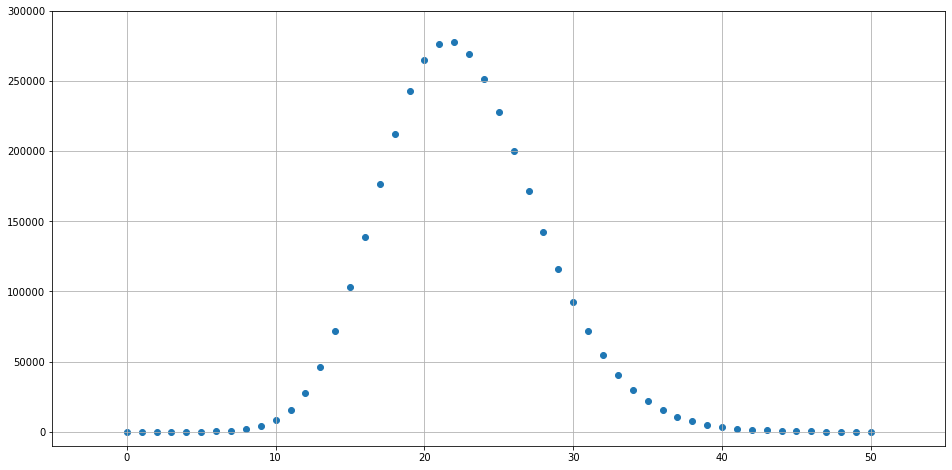

In [20]:
import scipy.linalg
from scipy.linalg import expm, sinm, cosm

x = []
y = []
t=0
for i in range (0,51):
    matt = a*t
    exp = scipy.linalg.expm(matt)
    norma = np.linalg.norm(exp,2)
    y.append(norma)
    x.append(t)
    t = t+1
# print(x)
# print()
# print(y)
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.grid(axis = 'both')
plt.xlim(-5,55)
plt.ylim(-10000,300000)
plt.scatter(x,y)


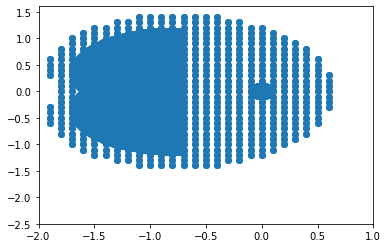

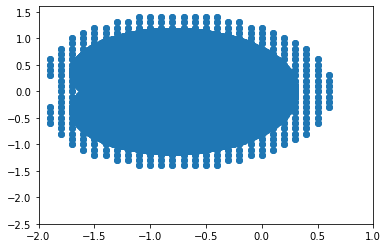

KeyboardInterrupt: 

In [34]:
for i in range(1,5):
    e = 10**(-i)
    Id = np.zeros((32,32))
    
    for i in range(32):
        Id [i,i] = 1
        
# print(len(a))
# print()
# print(len(z*Id))
    for x in np.arange(-2,1,e):
        for y in np.arange(-2,1.5,e):
            z = complex(x,y)
            Vozm = z*Id - a
            u,s,vh = np.linalg.svd(Vozm)
            if (np.min(s))**0.5 <= e:
                Re.append(x)
                Im.append(y)
                absc.append(z)
    ordin = np.arange(i)
    plt.scatter(Re,Im)
    plt.xlim(-2,1)
    plt.ylim(-2.5,1.6)
    plt.show()

In [22]:
# Задача №6
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

n = 100
u = np.random.normal(0,1,n)
d = np.random.normal(0,1,n)

u = u[:, np.newaxis] # Делаем из u вектор-столбец

# Cоберем матрицу А
A = (u @ u.T)/(u.T @ u) + np.diag(d)
minsobstv = np.min(LA.eigvalsh(A)) # минимальное собственное число

sys = LA.eigh(A)
# print(sys[0])
print()
a = sys[:][:][1]
sobvek = a[:][0] # собственный вектор, соответствующий минимальному собственному занчению
print(sobvek)
print()
print(minsobstv)



[-2.12062643e-04  6.04162905e-05 -5.13314884e-05  1.89583876e-04
 -5.05078490e-04  1.94020297e-04 -1.60065388e-04  3.36211356e-04
 -1.35336855e-04  4.07771576e-04 -3.59109579e-04  2.94935718e-04
 -6.18556685e-04 -1.73105280e-04  7.03418281e-04 -2.11524670e-04
 -5.51075410e-04 -2.26730766e-05 -1.02996708e-04  4.58822741e-04
 -4.72742394e-04 -1.46953881e-05  7.39371837e-04  2.22429135e-04
 -2.91669796e-04 -4.17710739e-04 -1.20106973e-04  2.24005325e-03
 -1.25217847e-04 -2.98796494e-04 -9.58418622e-04  1.99684570e-04
  4.51829842e-04  5.55233851e-04  1.55132750e-04  1.84015196e-03
 -7.71821860e-05 -1.57727333e-03 -7.92890709e-04 -1.52423592e-03
 -6.92011319e-04  3.26541842e-03  2.90827426e-04  2.77424251e-03
  6.69468628e-04  4.65115937e-03 -5.70407632e-03 -8.03232699e-03
 -9.98820920e-04  9.99742073e-01  1.24517950e-02 -2.88791906e-04
 -7.54292762e-06 -2.25834326e-04 -1.99301283e-04 -9.60519370e-03
  6.21682044e-03  6.07465362e-04  2.33728664e-04  4.86509648e-04
  8.45300831e-05  1.5583

In [ ]:
n = 100000
u = np.random.normal(0,1,n)
d = np.random.normal(0,1,n)

u = u[:, np.newaxis] # Делаем из u вектор-столбец

# Cоберем матрицу А
A = (u @ u.T)/(u.T @ u) + np.diag(d)
minsobstv = np.min(LA.eigvalsh(A)) # минимальное собственное число

sys = LA.eigh(A)
# print(sys[0])
print()
a = sys[:][:][1]
sobvek = a[:][0] # собственный вектор, соответствующий минимальному собственному занчению
print(sobvek)
print()
print(minsobstv)